In [24]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

In [17]:
channels=pd.read_csv('ChannelID_Data.csv')

In [18]:
channels = channels[channels.video_count>0]

In [19]:
channels['viewpervideo']=channels.view_count/channels.video_count

In [20]:
channels['engagement_subs']=channels.viewpervideo/channels.subscriber_count

## YouTube Video Performance by Category:

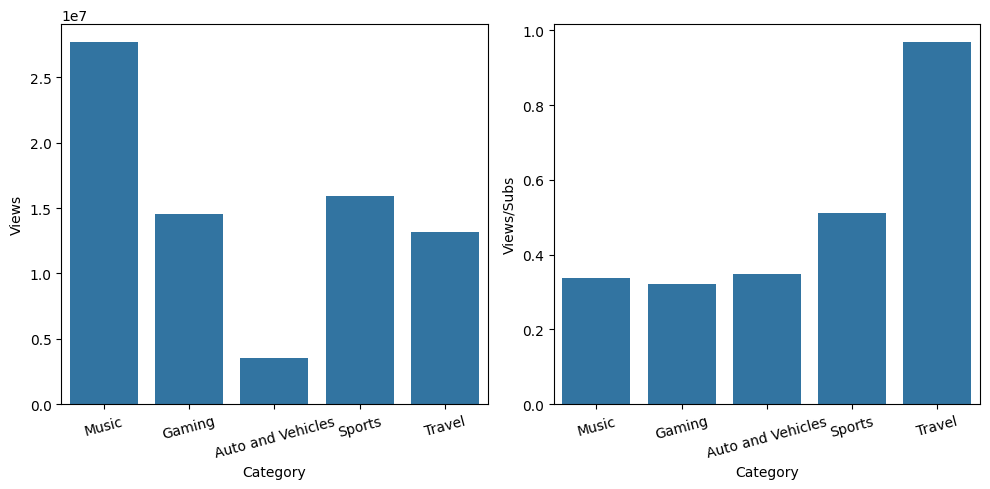

In [22]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)

# First barplot (Views per Video)
sns.barplot(channels, x='Category', y='viewpervideo', errorbar=None, ax=ax[0])
ax[0].set_ylabel('Views')
ax[0].set_xlabel('Category')
ax[0].tick_params(axis='x', rotation=15)  # Rotate x labels

# Second barplot (Views/Subs)
sns.barplot(channels, x='Category', y='engagement_subs', errorbar=None, ax=ax[1])
ax[1].set_ylabel('Views/Subs')
ax[1].set_xlabel('Category')
ax[1].tick_params(axis='x', rotation=15)  # Rotate x labels

plt.tight_layout()
plt.savefig('fig2.jpg', dpi=300)


## Subscriber to Channel Performance

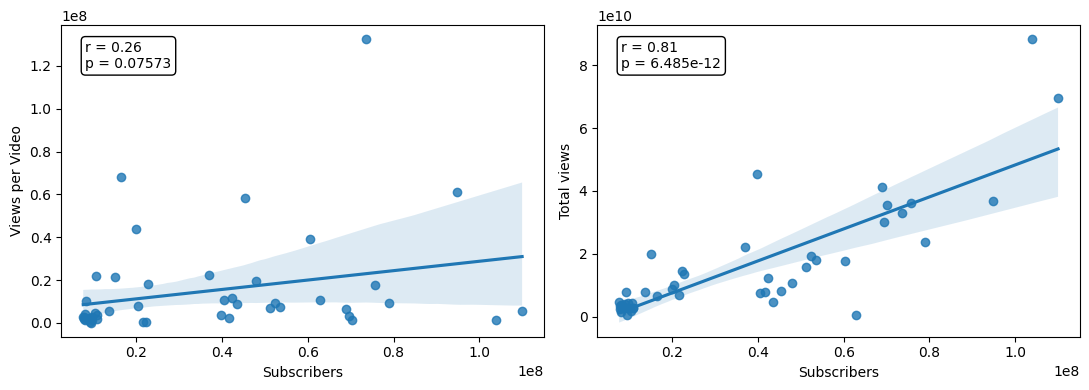

In [25]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(channels['subscriber_count'].drop(0), channels['viewpervideo'].drop(0))
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(channels['subscriber_count'].drop(0), channels['view_count'].drop(0))

fig, ax = plt.subplots(figsize=(11, 4), ncols=2, nrows=1)

sns.regplot(channels.drop(0), y='viewpervideo', x='subscriber_count', ax=ax[0])
ax[0].set_ylabel('Views per Video')
ax[0].set_xlabel('Subscribers')
ax[0].annotate(f'r = {r_value1:.2f}\np = {p_value1:.5f}', xy=(0.05, 0.95), xycoords='axes fraction', 
               fontsize=10, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

sns.regplot(channels.drop(0), y='view_count', x='subscriber_count', ax=ax[1])
ax[1].set_ylabel('Total views')
ax[1].set_xlabel('Subscribers')
ax[1].annotate(f'r = {r_value2:.2f}\np = {p_value2:.3e}', xy=(0.05, 0.95), xycoords='axes fraction', 
               fontsize=10, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.tight_layout()
plt.savefig('fig3.jpg', dpi=300)

In [26]:
display(stats.linregress(channels.drop(0).viewpervideo,channels.drop(0).subscriber_count))
display(stats.linregress(channels.drop(0).view_count,channels.drop(0).subscriber_count))

LinregressResult(slope=0.31894356608519997, intercept=31434492.303360004, rvalue=0.2644571933154239, pvalue=0.075725581620709, stderr=0.17534289190982102, intercept_stderr=4924364.784139352)

LinregressResult(slope=0.0012993408688341096, intercept=15668272.289649595, rvalue=0.8133513867162923, pvalue=6.4849649793110035e-12, stderr=0.00014011089822504942, intercept_stderr=3356202.4596433914)